add Tissot's indicatrix (circles) to display distortion

In [1]:

import vmapper
import os
import pandas as pd
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

import matplotlib.pyplot as plt
import seaborn as sns

from catppuccin_palette import catppuccin as cpc
import mplcatppuccin
from mplcatppuccin.palette import load_color
from mplcatppuccin.colormaps import get_colormap_from_list
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
#from jinja2 import Environment, PackageLoader, select_autoescape
import jinja2

In [2]:

import importlib
importlib.reload(vmapper)

<module 'vmapper' from '/home/benny/Workspaces/github/vmapper/vmapper/__init__.py'>

In [3]:
fs = sorted(os.listdir('../data/natural_earth'))
fs = [f for f in fs if '.shp' in f]
fs

['ne_110m_admin_0_boundary_lines_land.shp',
 'ne_110m_admin_0_countries.shp',
 'ne_110m_admin_0_countries2.shp',
 'ne_110m_graticules_1.shp',
 'ne_110m_graticules_10.shp',
 'ne_110m_graticules_15.shp',
 'ne_110m_graticules_20.shp',
 'ne_110m_graticules_30.shp',
 'ne_110m_graticules_5.shp',
 'ne_110m_land.shp',
 'ne_110m_ocean.shp',
 'ne_110m_wgs84_bounding_box.shp']

<Axes: >

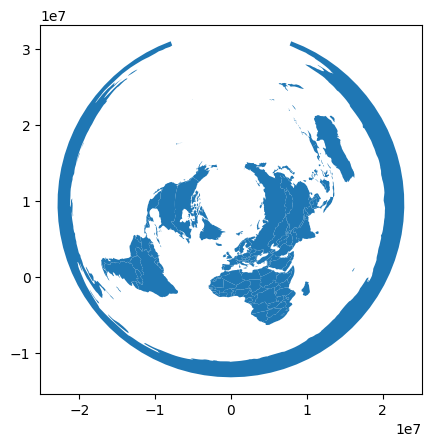

In [4]:
fp = '../data/natural_earth/ne_110m_admin_0_countries2.shp'
#fp = 'data/natural_earth/ne_110m_land.shp'
gdf = gpd.read_file(fp)
#gdf.plot()
gdf.to_crs('+proj=tissot +lat_1=60 +lat_2=65').plot()

<Axes: >

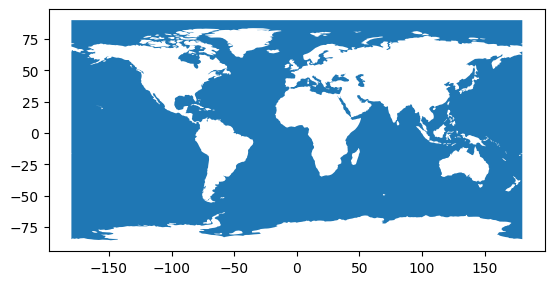

In [5]:
fp = '../data/natural_earth/ne_110m_ocean.shp'
gdf_sea = gpd.read_file(fp)
gdf_sea.plot()

<Axes: >

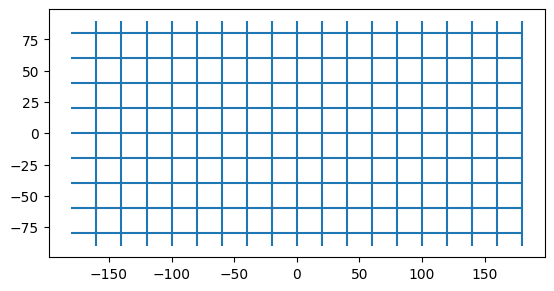

In [6]:
fp = '../data/natural_earth/ne_110m_graticules_20.shp'
grid = gpd.read_file(fp)
grid.plot()

In [7]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
gdf.head()
#gdf2 = gdf.reset_index()
#gdf2.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3   
0  Admin-0 country          1          6                         Fiji    FJI  \
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...   
0         0      2  Sovereign country   1                         Fiji  ...  \
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL FCLASS_GR  FCLASS_IT   
0          None          None          None      None       None  \
1          None          None          None      None       None   
2  Unrecognized  Unrecognized  Unrecognized      None       None   
3          None          None          None      None       None   
4          None          None          None      None       None   

      FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA   
0          None      None       None      None  \
1          None      None       None      None   
2  Unrecognized      None       None      None   
3          None      None       None      None   
4          None      None       None      None   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  

[5 rows x 169 columns]

<Axes: >

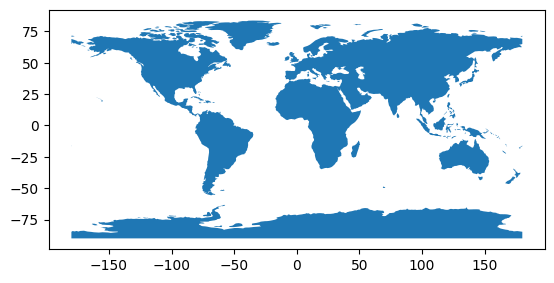

In [9]:
gdf2 = gdf#[gdf['SOV_A3']!='ATA']
gdf2 = gdf2.dissolve()
#gdf2 = gdf.reset_index()
#gdf2 = gdf2[gdf2['index']!=4]
gdf2.plot()

In [10]:
gdf3 = gdf2.explode()
gdf3 = gdf3[['featurecla', 'geometry']]
gdf3['area'] = gdf3.area
gdf3

/tmp/ipykernel_41114/524009270.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf3 = gdf2.explode()
/home/benny/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/geopandas/geodataframe.py:1805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[exploded_geom.name] = exploded_geom.values
/tmp/ipykernel_41114/524009270.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf3['area'] = gdf3.area


featurecla                                           geometry   
0 0    Admin-0 country  POLYGON ((-163.71290 -78.59567, -163.71290 -78...  \
  1    Admin-0 country  POLYGON ((-122.40624 -73.32462, -121.21151 -73...   
  2    Admin-0 country  POLYGON ((-124.03188 -73.87327, -124.61947 -73...   
  3    Admin-0 country  POLYGON ((-100.78346 -72.50162, -101.80187 -72...   
  4    Admin-0 country  POLYGON ((-179.79332 -16.02088, -179.91737 -16...   
...                ...                                                ...   
  122  Admin-0 country  POLYGON ((143.50528 46.13791, 142.74770 46.740...   
  123  Admin-0 country  POLYGON ((178.72530 71.09880, 180.00000 71.515...   
  124  Admin-0 country  POLYGON ((140.81171 73.76506, 142.06207 73.857...   
  125  Admin-0 country  POLYGON ((147.97746 74.77836, 146.11919 75.172...   
  126  Admin-0 country  POLYGON ((141.47161 76.09289, 145.08629 75.562...   

            area  
0 0     3.716703  
  1     1.541898  
  2     0.683017  
  3     3.004556  
  4     0.066993  
...          ...  
  122  10.600657  
  123   0.614355  
  124   1.628959  
  125   2.006982  
  126   8.673320  

[127 rows x 3 columns]

<Axes: >

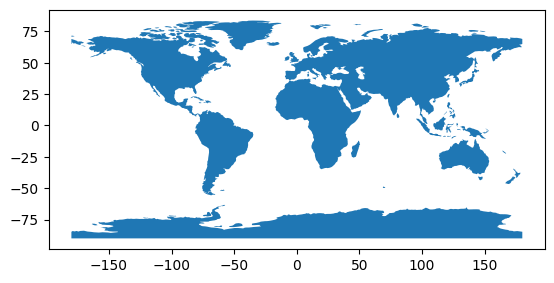

In [11]:
gdf4 = gdf3[gdf3['area']>1]
gdf4 = gdf4.reset_index(drop=True).reset_index().rename(columns={'index': 'id'})
gdf4.plot()

In [12]:
gdf4

id       featurecla                                           geometry   
0    0  Admin-0 country  POLYGON ((-163.71290 -78.59567, -163.71290 -78...  \
1    1  Admin-0 country  POLYGON ((-122.40624 -73.32462, -121.21151 -73...   
2    2  Admin-0 country  POLYGON ((-100.78346 -72.50162, -101.80187 -72...   
3    3  Admin-0 country  POLYGON ((-78.18210 8.31918, -78.43547 8.38771...   
4    4  Admin-0 country  POLYGON ((-128.35841 50.77065, -127.30858 50.5...   
..  ..              ...                                                ...   
87  87  Admin-0 country  POLYGON ((139.81754 42.56376, 140.31209 43.333...   
88  88  Admin-0 country  POLYGON ((143.50528 46.13791, 142.74770 46.740...   
89  89  Admin-0 country  POLYGON ((140.81171 73.76506, 142.06207 73.857...   
90  90  Admin-0 country  POLYGON ((147.97746 74.77836, 146.11919 75.172...   
91  91  Admin-0 country  POLYGON ((141.47161 76.09289, 145.08629 75.562...   

           area  
0      3.716703  
1      1.541898  
2      3.004556  
3   4158.334445  
4      4.056773  
..          ...  
87     9.979769  
88    10.600657  
89     1.628959  
90     2.006982  
91     8.673320  

[92 rows x 4 columns]

In [13]:
grid['display0'] = [d.replace(' ', '') for d in grid['display']]
grid

recnum  degrees direction display  scalerank   dd   
0       27       80         N    80 N          2   80  \
1       26       60         N    60 N          2   60   
2       25       40         N    40 N          2   40   
3       24       20         N    20 N          2   20   
4       23        0      None    0 NS          2    0   
5       22       20         S    20 S          2  -20   
6       21       40         S    40 S          2  -40   
7       20       60         S    60 S          2  -60   
8       19       80         S    80 S          2  -80   
9       18      180         E   180 E          2  180   
10      17      160         E   160 E          2  160   
11      16      140         E   140 E          2  140   
12      15      120         E   120 E          2  120   
13      14      100         E   100 E          2  100   
14      13       80         E    80 E          2   80   
15      12       60         E    60 E          2   60   
16      11       40         E    40 E          2   40   
17      10       20         E    20 E          2   20   
18       9        0      None    0 EW          2    0   
19       8       20         W    20 W          2  -20   
20       7       40         W    40 W          2  -40   
21       6       60         W    60 W          2  -60   
22       5       80         W    80 W          2  -80   
23       4      100         W   100 W          2  -10   
24       3      120         W   120 W          2  -12   
25       2      140         W   140 W          2  -14   
26       1      160         W   160 W          2  -16   

                                             geometry display0  
0   LINESTRING (180.00000 79.99848, 179.99664 79.9...      80N  
1   LINESTRING (180.00000 59.99866, 179.99664 59.9...      60N  
2   LINESTRING (179.99990 39.99875, 179.99664 39.9...      40N  
3   LINESTRING (180.00000 19.99909, 179.99664 19.9...      20N  
4   LINESTRING (179.99990 -0.00083, 179.99664 -0.0...      0NS  
5   LINESTRING (179.99990 -20.00069, 179.99664 -20...      20S  
6   LINESTRING (180.00000 -40.00035, 179.99664 -40...      40S  
7   LINESTRING (179.99995 -60.00026, 179.99664 -60...      60S  
8   LINESTRING (179.99995 -80.00013, 179.99664 -80...      80S  
9   LINESTRING (179.99664 -89.99993, 179.99664 -89...     180E  
10  LINESTRING (159.99683 -89.99993, 159.99683 -89...     160E  
11  LINESTRING (139.99702 -89.99993, 139.99702 -89...     140E  
12  LINESTRING (119.99720 -89.99993, 119.99720 -89...     120E  
13  LINESTRING (99.99734 -89.99993, 99.99734 -89.4...     100E  
14  LINESTRING (79.99758 -89.99993, 79.99758 -89.4...      80E  
15  LINESTRING (59.99776 -89.99993, 59.99776 -89.4...      60E  
16  LINESTRING (39.99795 -89.99993, 39.99795 -89.4...      40E  
17  LINESTRING (19.99814 -89.99993, 19.99814 -89.4...      20E  
18  LINESTRING (-0.00167 -89.99993, -0.00167 -89.4...      0EW  
19  LINESTRING (-20.00149 -89.99993, -20.00149 -89...      20W  
20  LINESTRING (-40.00130 -89.99993, -40.00130 -89...      40W  
21  LINESTRING (-60.00111 -89.99993, -60.00111 -89...      60W  
22  LINESTRING (-80.00093 -89.99993, -80.00093 -89...      80W  
23  LINESTRING (-100.00074 -89.99993, -100.00074 -...     100W  
24  LINESTRING (-120.00055 -89.99993, -120.00055 -...     120W  
25  LINESTRING (-140.00036 -89.99993, -140.00036 -...     140W  
26  LINESTRING (-160.00018 -89.99993, -160.00018 -...     160W

<Axes: >

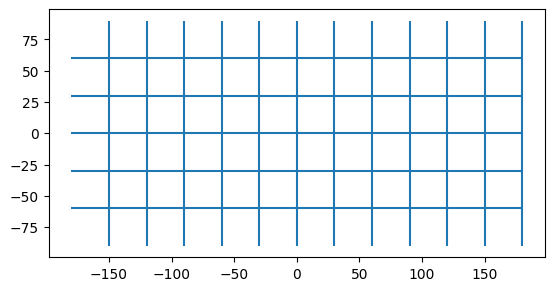

In [14]:
fp = '../data/natural_earth/ne_110m_graticules_30.shp'
grid2 = gpd.read_file(fp)
grid2.plot()

In [15]:
grid2.head()

recnum  degrees direction display  scalerank  dd   
0      18       60         N    60 N          1  60  \
1      17       30         N    30 N          1  30   
2      16        0      None       0          1   0   
3      15       30         S    30 S          1 -30   
4      14       60         S    60 S          1 -60   

                                            geometry  
0  LINESTRING (180.00000 59.99866, 179.99664 59.9...  
1  LINESTRING (179.99990 29.99889, 179.99664 29.9...  
2  LINESTRING (179.99990 -0.00083, 179.99664 -0.0...  
3  LINESTRING (180.00000 -30.00049, 179.99664 -30...  
4  LINESTRING (179.99995 -60.00026, 179.99664 -60...

In [16]:
dhs = []
for di in range(9):
    dh = di*20 - 80
    dhs.append(dh)
dvs = []
for dj in range(17):
    dv = dj*20-160
    dvs.append(dv)

dvs, dhs

([-160,
  -140,
  -120,
  -100,
  -80,
  -60,
  -40,
  -20,
  0,
  20,
  40,
  60,
  80,
  100,
  120,
  140,
  160],
 [-80, -60, -40, -20, 0, 20, 40, 60, 80])

<Axes: >

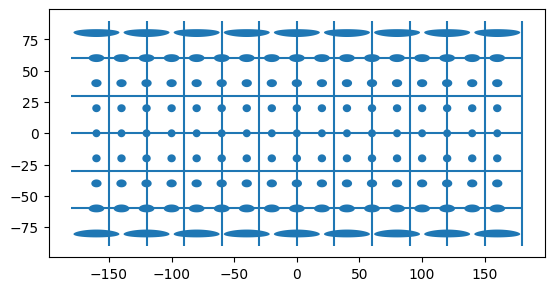

In [17]:
px = []
py = []
#pts = []
circles = []
for y in dhs:
    for x in dvs:
        if abs(y/80)==1 and abs(x)%40!=0:
            continue
        #print(x, y)
        pt = Point(x, y)
        #pts.append(pt)
        #buf = pt.buffer(6.)
        this_crs = '+proj=aeqd +lat_0={} +lon_0={} +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs'.format(y, x)
        tmp = gpd.GeoSeries([pt], crs='epsg:4326').to_crs(this_crs)
        tmp2 = [p.buffer(350000) for p in tmp.geometry]
        tmp3 = gpd.GeoSeries(tmp2, crs=this_crs).to_crs('epsg:4326')
        #print(tmp3)
        buf = tmp3.geometry.tolist()[0]
        circles.append(buf)
        px.append(x)
        py.append(y)
tmp = pd.DataFrame({'x': px, 'y': py})
circles = gpd.GeoDataFrame(tmp, geometry=circles, crs='epsg:4326')

fig, ax = plt.subplots()
grid2.plot(ax=ax)
circles.plot(ax=ax)

<Axes: >

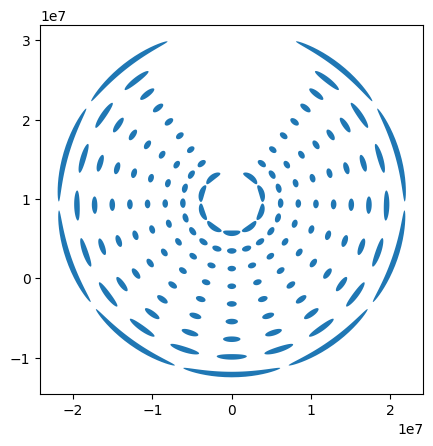

In [18]:
circles.to_crs('+proj=tissot +lat_1=60 +lat_2=65').plot()

<Axes: >

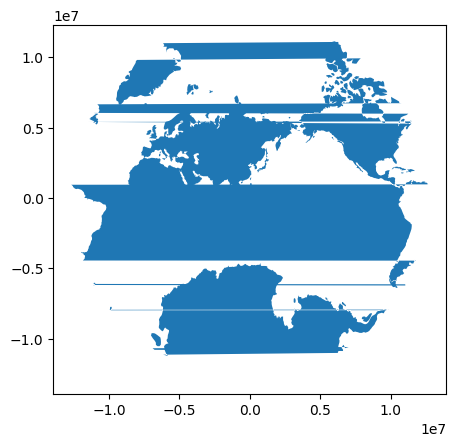

In [19]:
gdf4.to_crs('+proj=lagrng +lon_0=120').plot()

<Axes: >

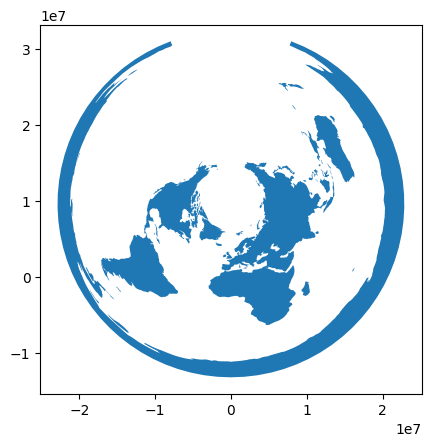

In [20]:
gdf4.to_crs('+proj=tissot +lat_1=60 +lat_2=65').plot()

<Axes: >

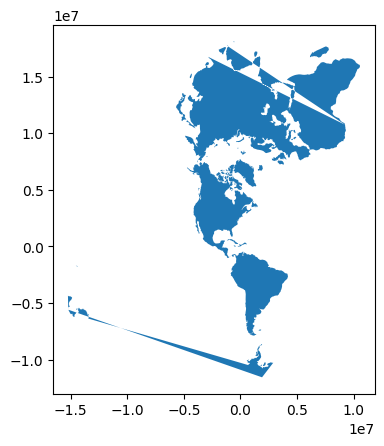

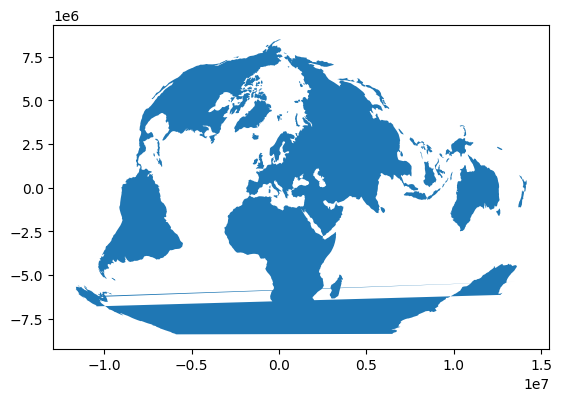

In [35]:

#gdf4.to_crs('+proj=webmerc +datum=WGS84').plot()
gdf4.to_crs('+proj=bipc +ns').plot()
gdf4.to_crs('+proj=bertin1953').plot()

<Axes: >

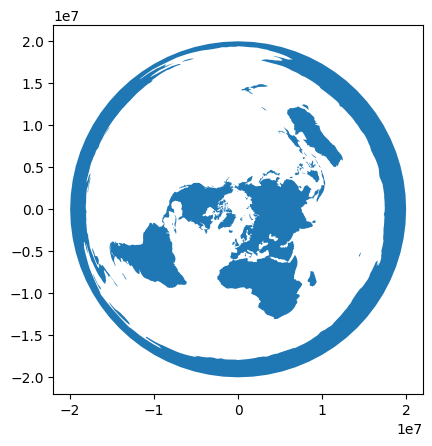

In [22]:
gdf4.to_crs('+proj=aeqd +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs').plot()

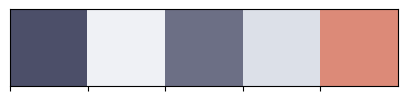

In [23]:
DARK = load_color('latte', 'text')
WHITE = load_color('latte', 'base')
LIGHTGRAY = load_color('latte', 'crust')
GRAY = load_color('latte', 'subtext0')
RED = load_color('latte', 'rosewater')
sns.palplot([DARK, WHITE, GRAY, LIGHTGRAY, RED])

In [24]:
cpc.color_palette

<function catppuccin_palette.catppuccin.color_palette(cat='mocha', n=None)>

In [99]:
projections = {
    #'Pseudo-Mercator': 'epsg:3857',
    #'Mercator': '+proj=merc', 
    #'Stereographic': '+proj=stere +lat_0=90 +lat_ts=75', 
    'Equal Earth': '+proj=eqearth',
    'Natural Earth': '+proj=natearth',
    'Robinson': '+proj=robin +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs', 
    'Eckert III': '+proj=eck3',
    'Urmaev Flat-Polar Sinusoidal': '+proj=urmfps +n=0.5',
    'Nell-Hammer': '+proj=nell_h',
    'Winkel Tripel': '+proj=wintri +lon_0=0 +lat_1=50.467 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs',
    'Times': '+proj=times',
    'Bacon Globular': '+proj=bacon',

    'Lagrange': '+proj=lagrng', 
    'van der Grinten': '+proj=vandg', 
    'Fahey': '+proj=fahey',
    'Mollweide': '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs',
    'Hammer-Eckert-Greifendorff': '+proj=hammer', 
    'Aitoff': '+proj=aitoff', 
    'Boggs Eumorphic': '+proj=boggs', 
    'Sinusoidal': '+proj=sinu', 
    'Foucaut': '+proj=fouc', 
    #'Tobler-Mercator': '+proj=tobmerc',
    'Roussilhe Stereographic': '+proj=rouss',
    'Bonne': '+proj=bonne +lat_1=10', 
    'Werner': '+proj=bonne +lat_1=90',
    'Polyconic': '+proj=poly', 
    'Rectangular Polyconic': '+proj=rpoly',
    'Laskowski': '+proj=lask', 
    'Lambert Azimuthal Equal Area': '+proj=laea',
    'Chamberlin Trimetric': '+proj=chamb +lat_1=10 +lon_1=30 +lon_2=40', 
    'Azimuthal Equidistant': '+proj=aeqd', 
    
    'Azimuthal Equidistant-UN': '+proj=aeqd +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs',
    'Euler': '+proj=euler +lat_1=67 +lat_2=75', 
    'Tissot': '+proj=tissot +lat_1=60 +lat_2=65',
    'Vitkovsky I': '+proj=vitk1 +lat_1=45 +lat_2=55', 
    'Murdoch I': '+proj=murd1 +lat_1=30 +lat_2=50',
    'Lambert Conformal Conic Alternative': '+proj=lcca +lat_0=35', 
    'Lambert Equal Area Conic': '+proj=leac',
    #'Gnomonic': '+proj=gnom +lat_0=90 +lon_0=-50 +R=6.4e6',

    'Gall Stereographic': '+proj=gall', 
    'Miller Cylindrical': '+proj=mill',
    'Patterson': '+proj=patterson', 

    'General Oblique Transformation': '+proj=ob_tran +o_proj=mill +o_lon_p=40 +o_lat_p=50 +lon_0=60',
    'Peirce Quincuncial': '+proj=peirce_q +lon_0=25 +shape=square', 
    #'Peirce Quincuncial-Diamond': '+proj=peirce_q +lon_0=25 +shape=diamond', 
    #'Peirce Quincuncial (Grieger Triptychial)': '+proj=pipeline +step +proj=ob_tran +o_proj=peirce_q +o_lat_p=-45 +o_lon_p=45 +o_type=horizontal +o_scrollx=-0.25 +step +proj=affine +s11=-1 +s12=0 +s21=0 +s22=-1', 
    'Adams World in a Square I': '+proj=adams_ws1', 
    'Adams World in a Square II': '+proj=adams_ws2', 
    'Collignon': '+proj=collg',
    'Interrupted Goode Homolosine': '+proj=igh +towgs84=0,0,0',
    'Interrupted Mollweide': '+proj=imoll', 
    #'Interrupted Goode Homolosine (Oceanic View)': '+proj=igh_o +lon_0=-160', 
    #'Interrupted Mollweide (Oceanic View)': '+proj=imoll_o +lon_0=-160',

}

/tmp/ipykernel_41114/669925838.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 6), facecolor=WHITE)


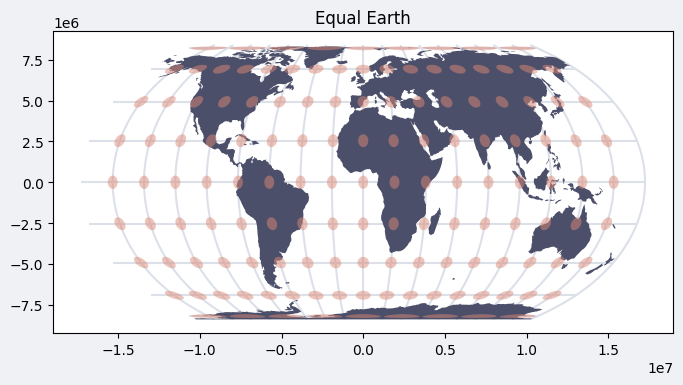

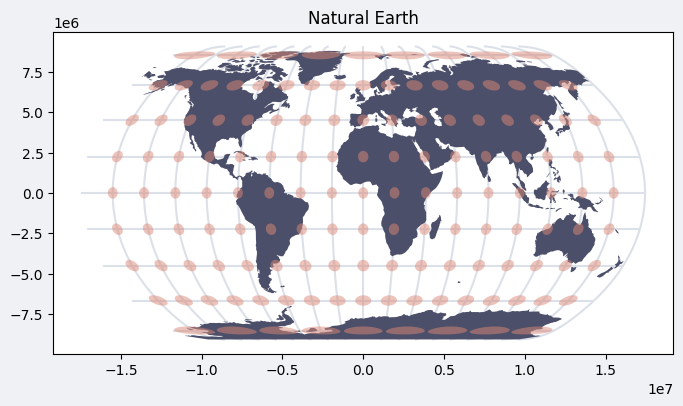

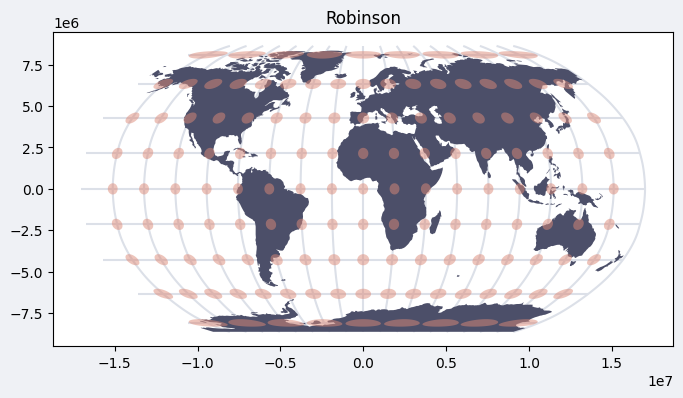

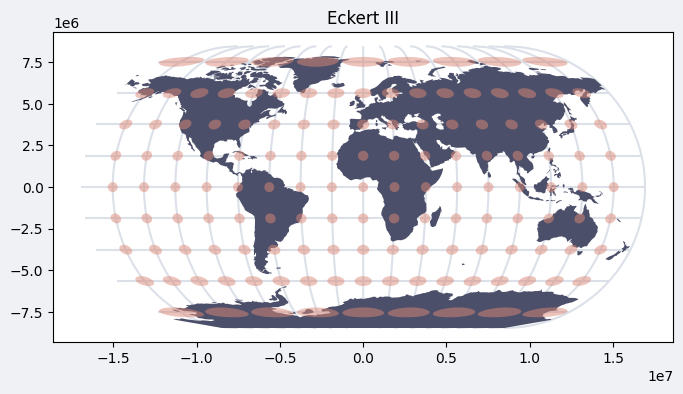

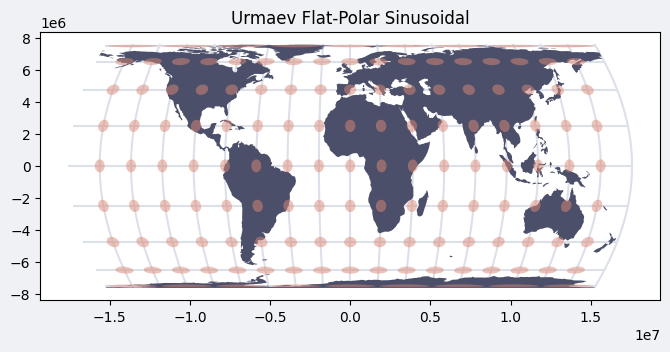

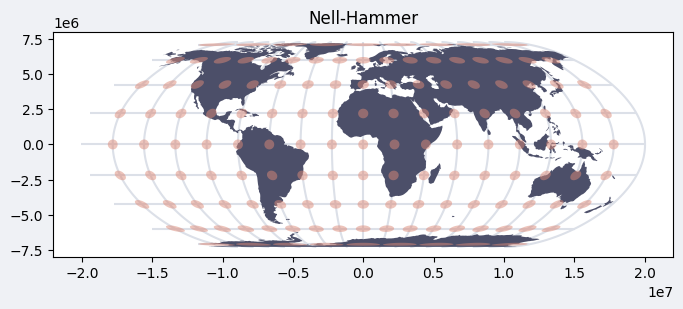

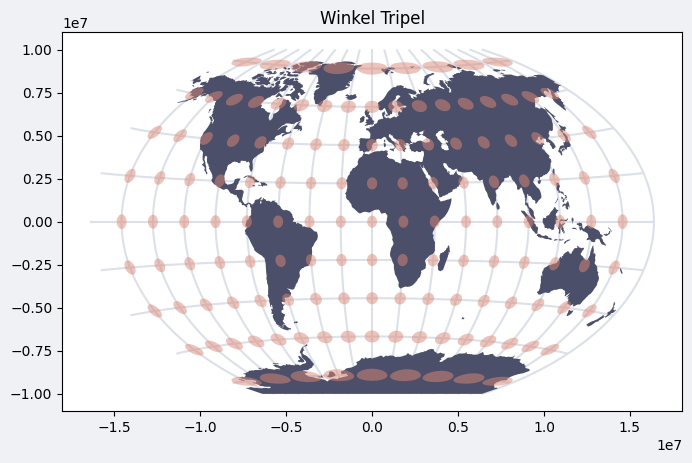

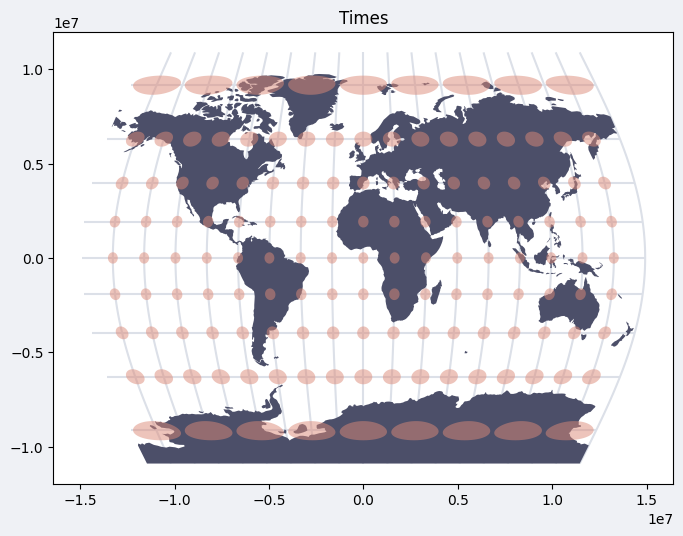

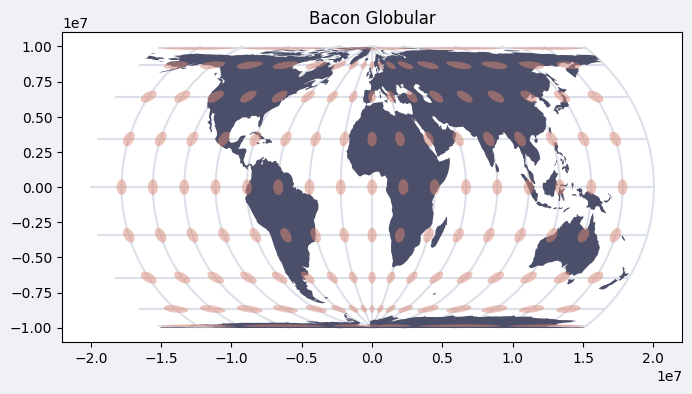

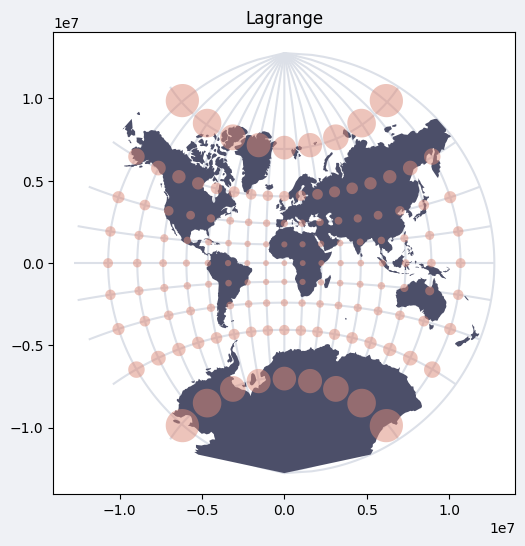

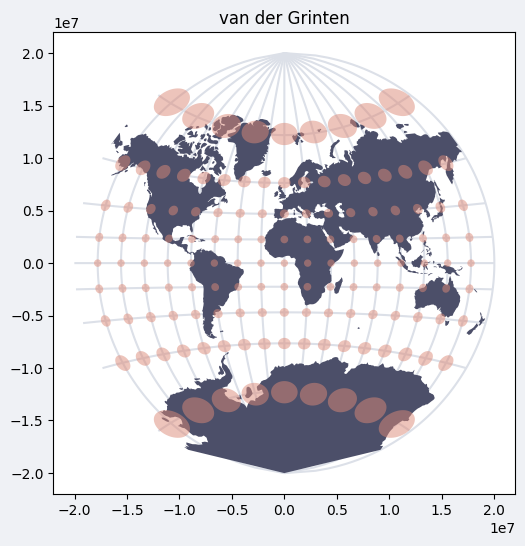

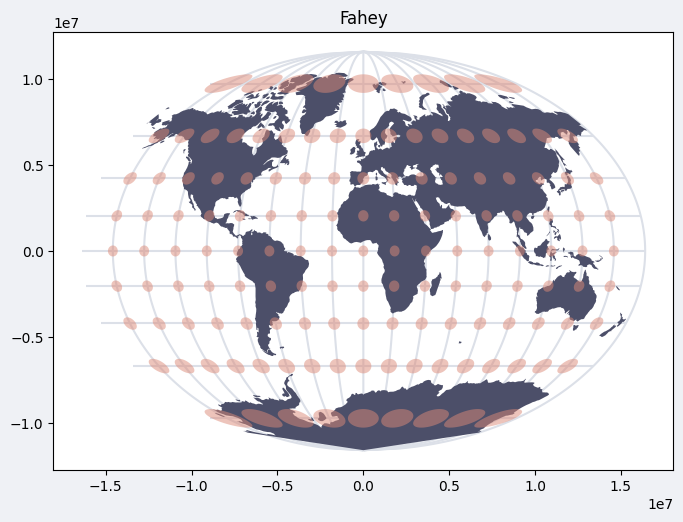

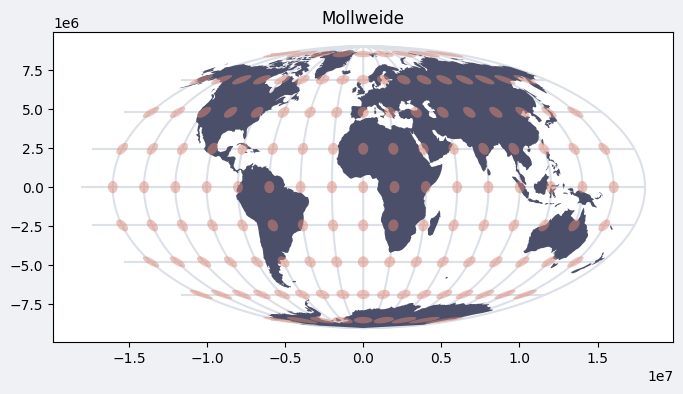

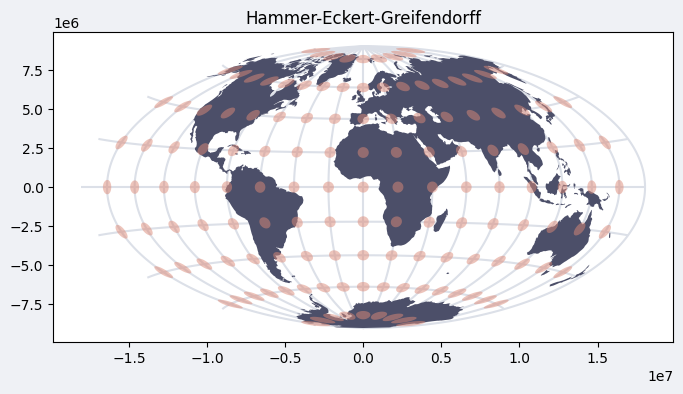

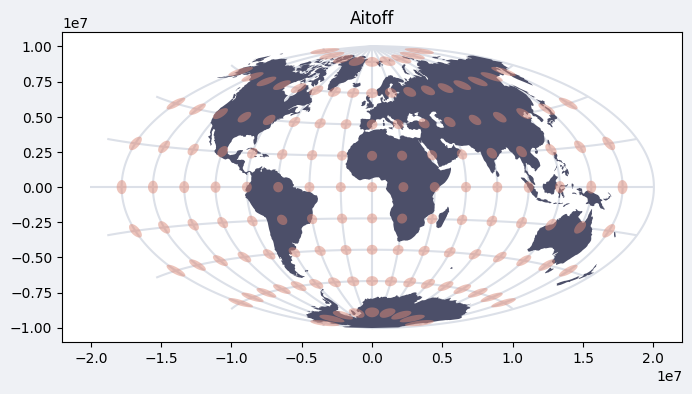

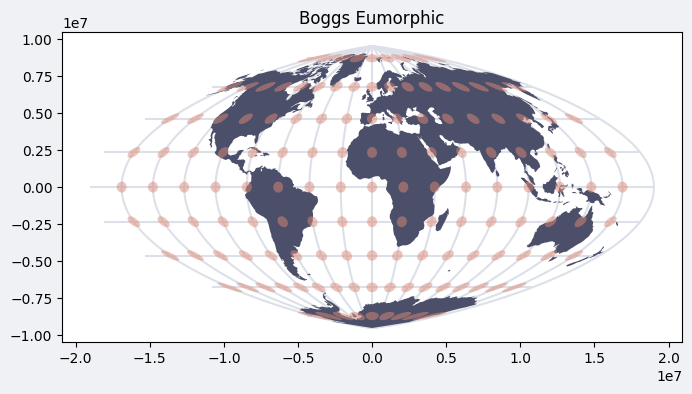

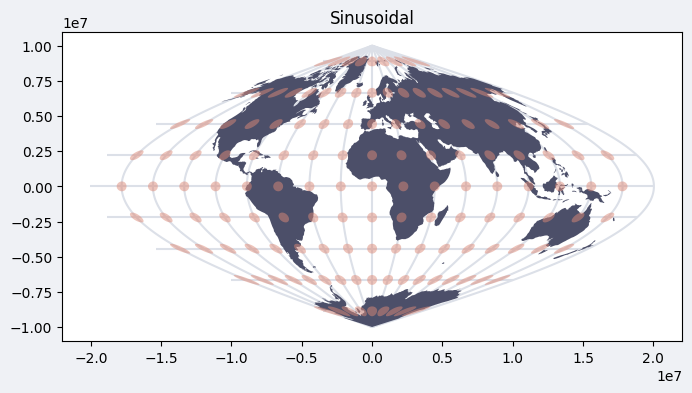

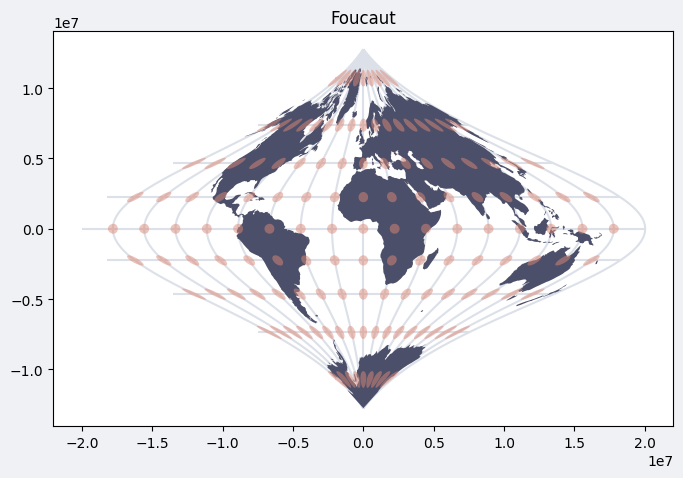

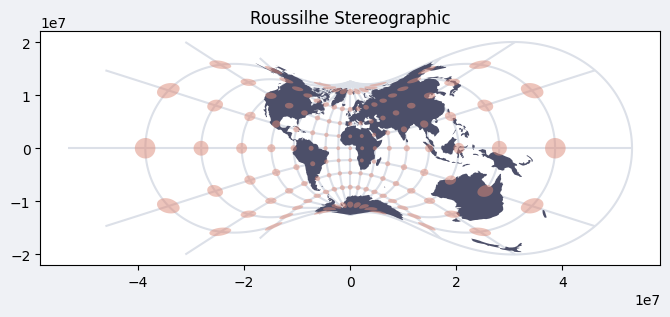

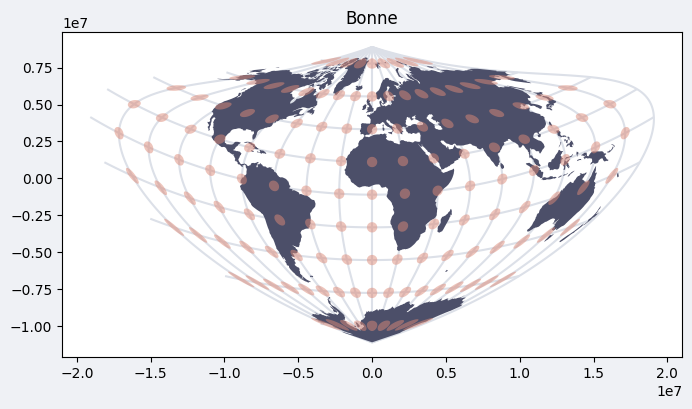

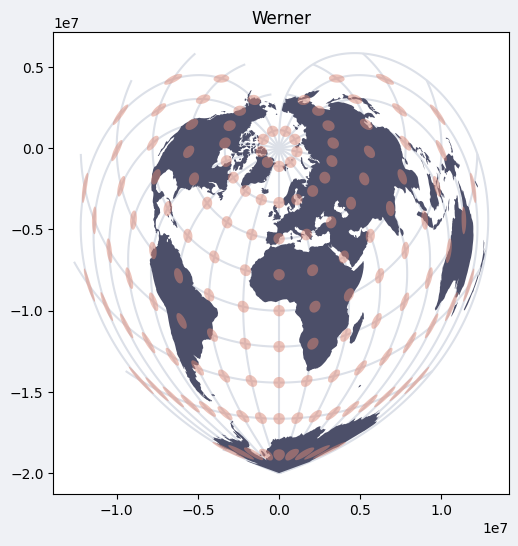

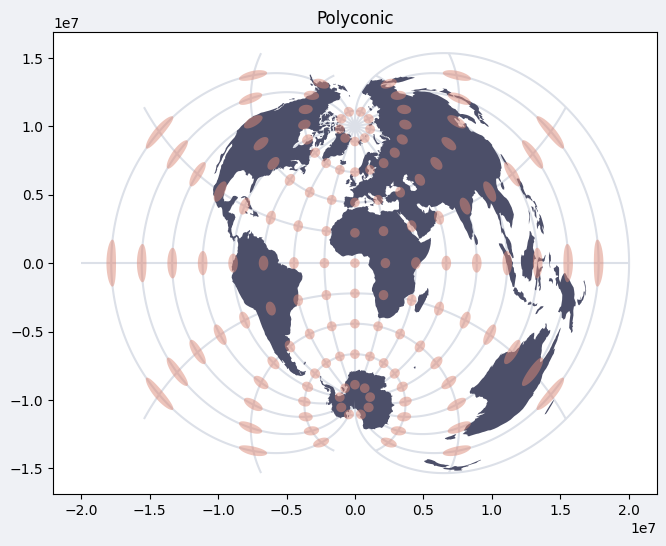

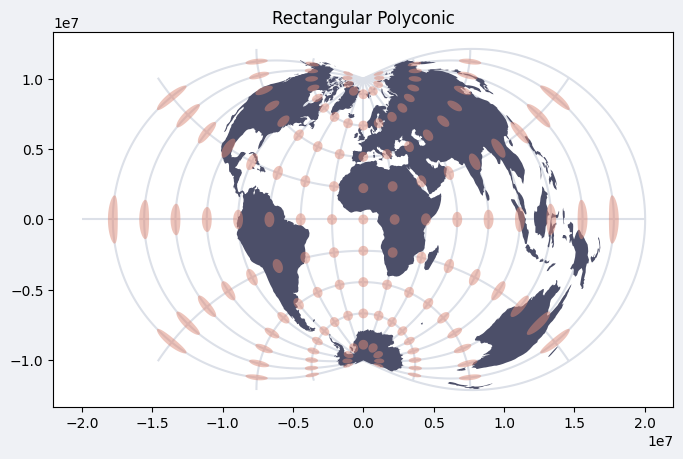

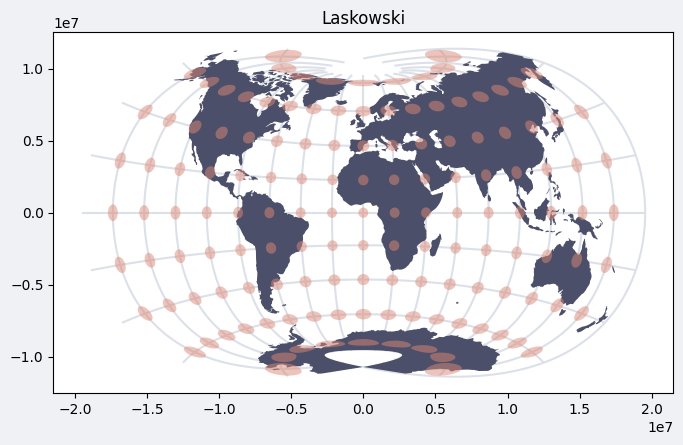

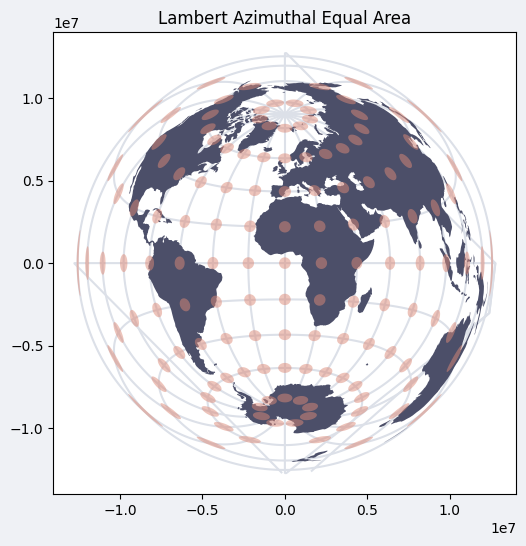

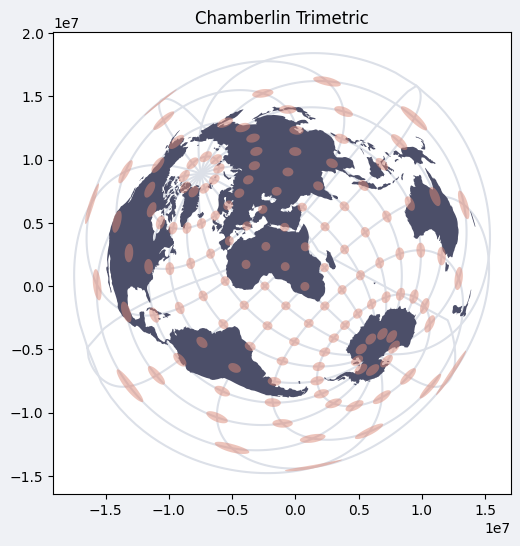

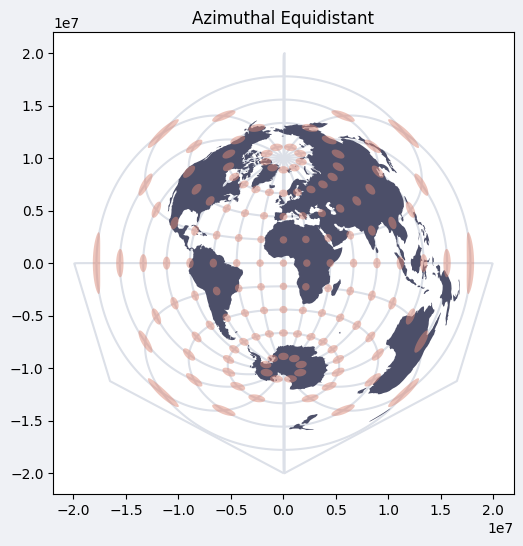

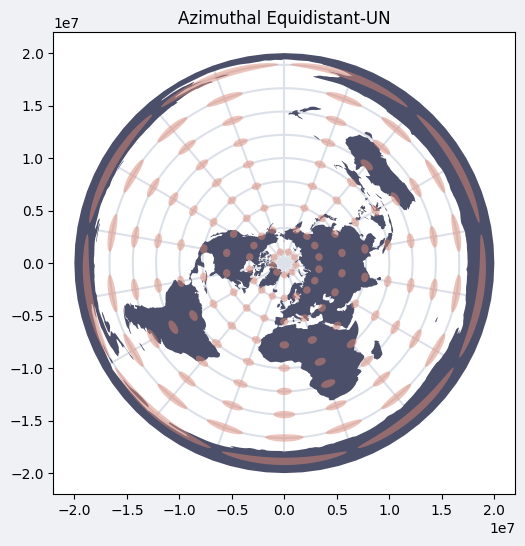

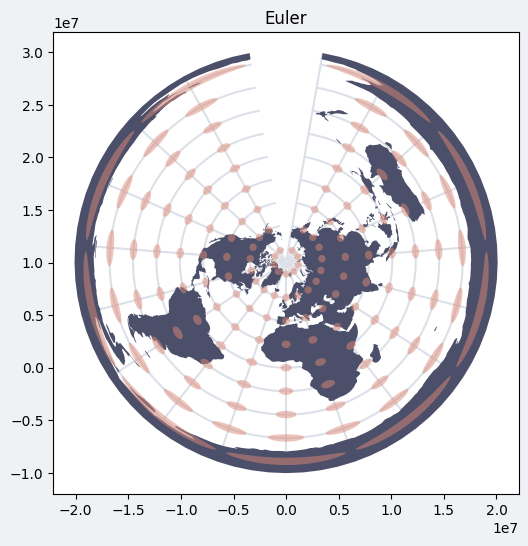

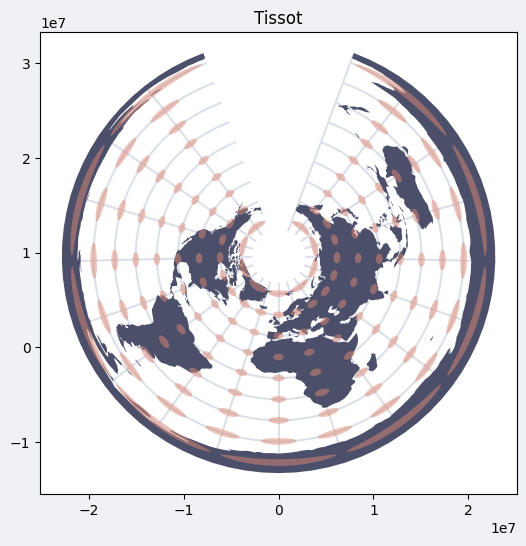

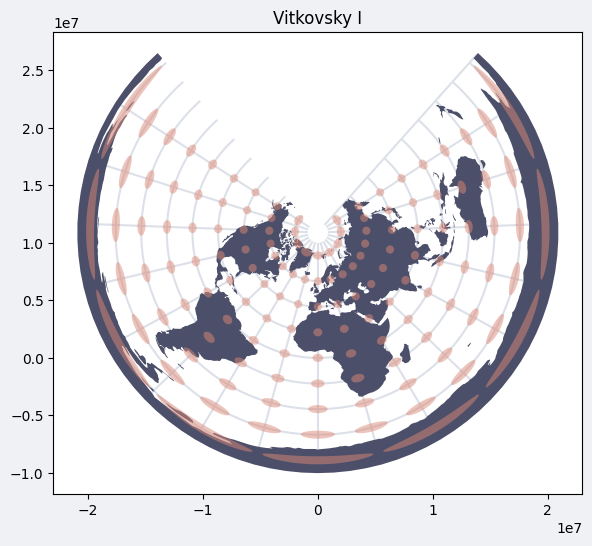

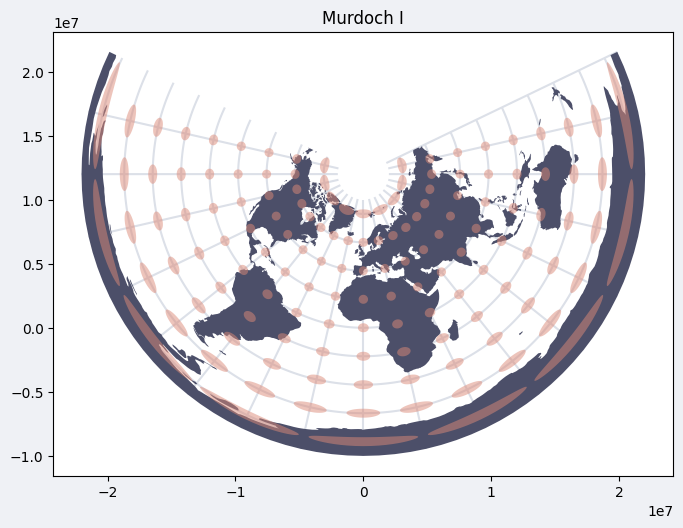

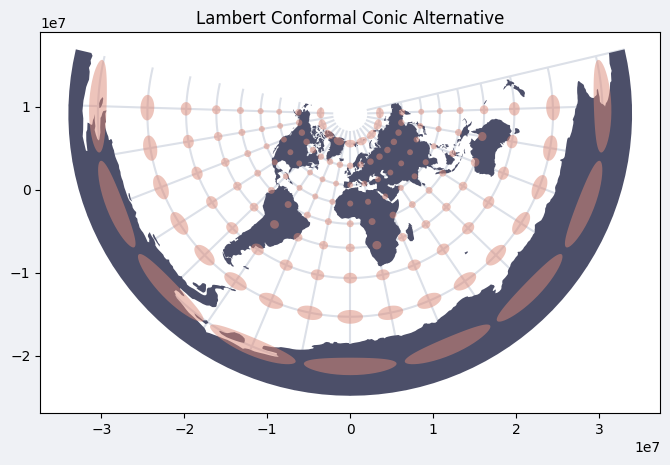

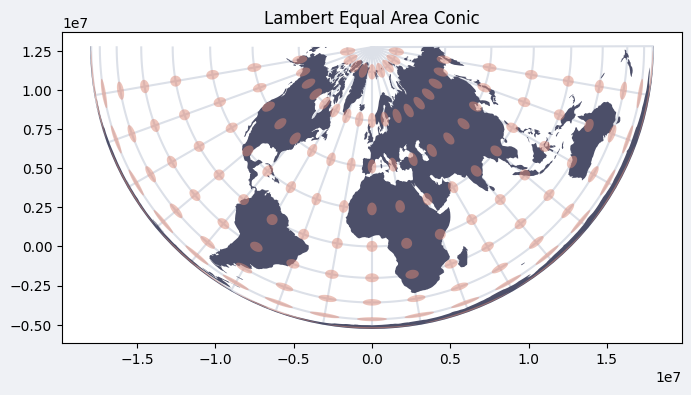

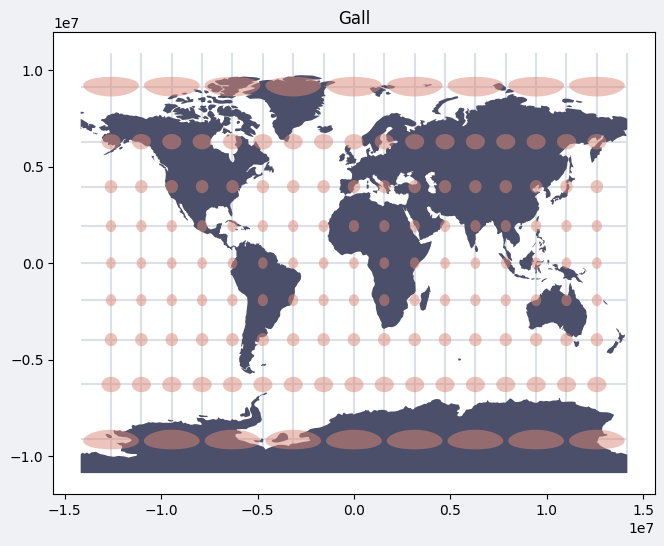

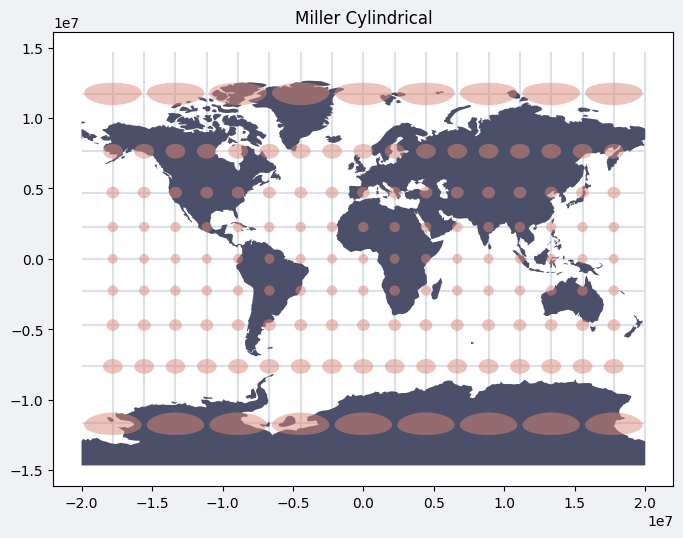

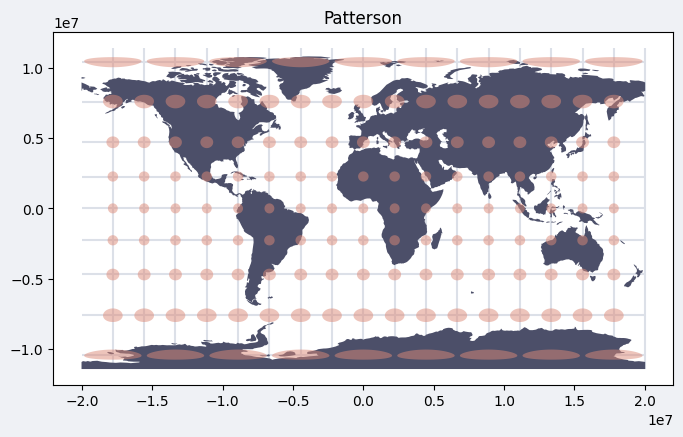

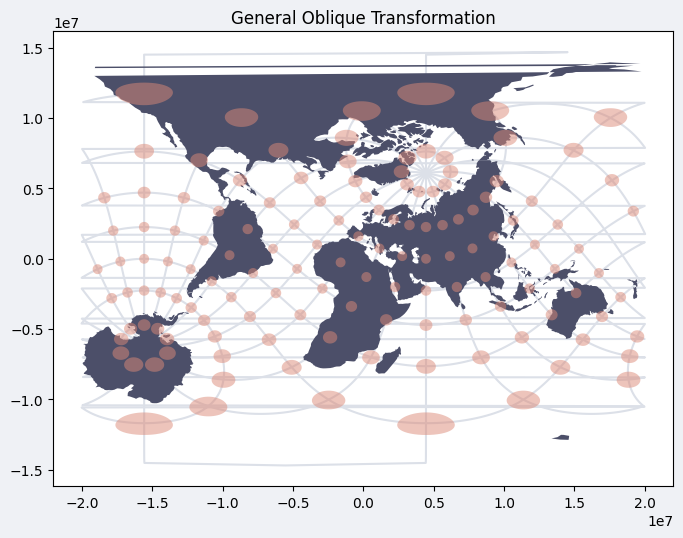

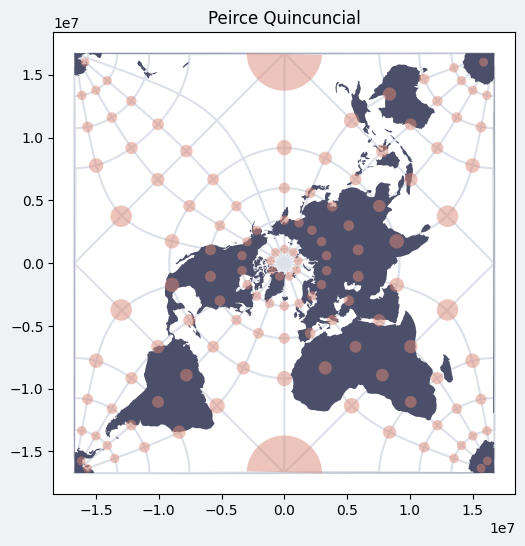

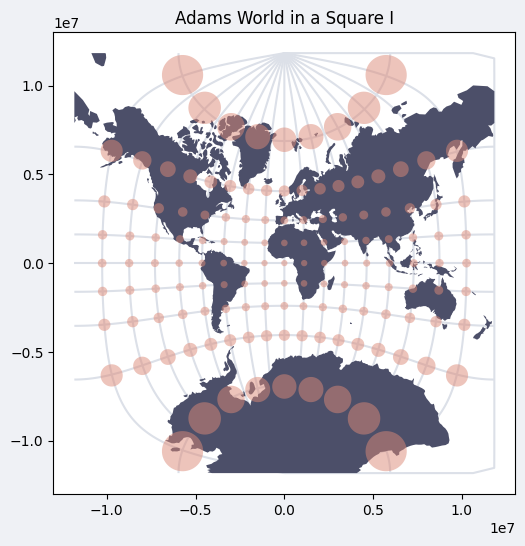

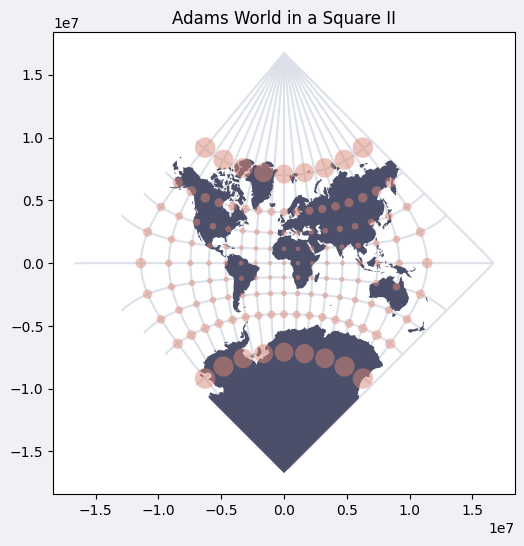

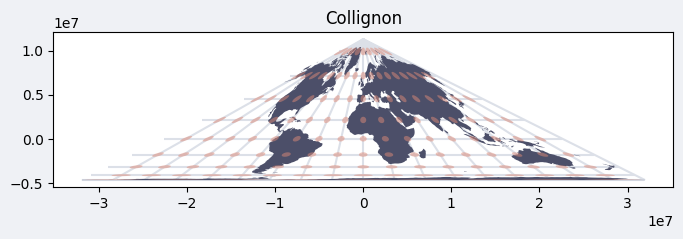

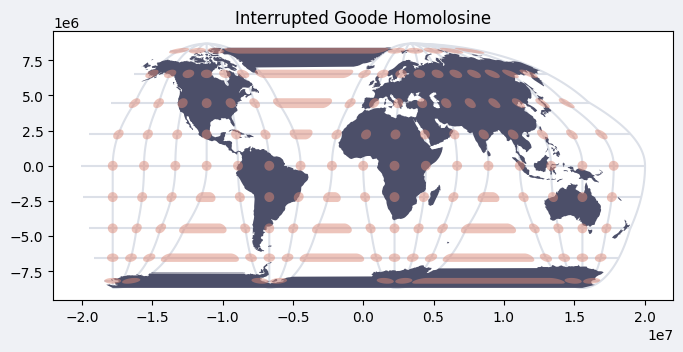

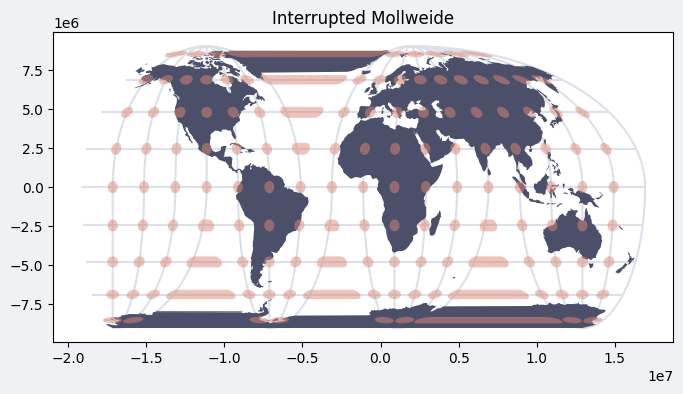

In [38]:
for k, crs in projections.items():
    fig, ax = plt.subplots(figsize=(8, 6), facecolor=WHITE)
    grid.to_crs(crs).plot(ec=LIGHTGRAY, ax=ax, zorder=2)
    #if 'Oceanic' in k:
    #    gdf_sea.to_crs(crs).plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
    #else:
    gdf4.to_crs(crs).plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
    tmp = circles.to_crs(crs)
    tmp['validity'] = tmp.is_valid
    tmp['area'] = tmp.area
    med = tmp['area'].median()
    ls = []
    pts = []
    for i in range(len(tmp)):
        row = tmp.iloc[i]
        a = row['area']
        if not(row['validity']) or np.log10(a)>(np.log10(med)+1.5):
            pts.append(Point(row['x'], row['y']))
            ls.append(i)
    pts = gpd.GeoSeries(pts, crs='epsg:4326').to_crs(crs).tolist()
    pts = [pt.buffer(0.1) for pt in pts]
    #print(pts)
    geom2 = []
    for i in range(len(tmp)):
        if i in ls:
            geom2.append(pts[ls.index(i)])
        else:
            row = tmp.iloc[i]
            geom2.append(row['geometry'])
    tmp['geometry'] = geom2
    #tmp2 = tmp[tmp.is_valid]
    tmp.plot(fc=RED, ec=WHITE, lw=0, alpha=.5, ax=ax, zorder=4)
    ax.set_title(k)
    #ax.axis('off')
    #image_name = 'exports/worldmap_{}.svg'.format(k.replace(' ', '_'))
    #image_format = 'svg'
    #fig.savefig(image_name, format=image_format, dpi=1200)
    #break

Text(0.5, 1.0, 'Chamberlin Trimetric')

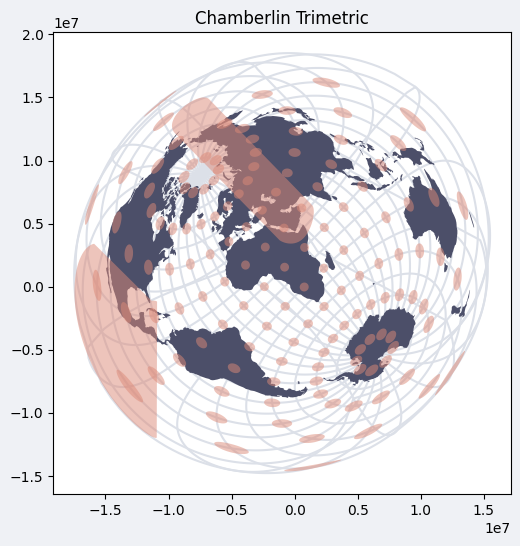

In [246]:
k = 'Chamberlin Trimetric'
crs = projections[k]

fig, ax = plt.subplots(figsize=(8, 6), facecolor=WHITE)
grid.to_crs(crs).plot(ec=LIGHTGRAY, ax=ax, zorder=2)
gdf4.to_crs(crs).plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
tmp = circles.to_crs(crs)
tmp2 = tmp[tmp.is_valid]
tmp2.plot(fc=RED, ec=WHITE, lw=0, alpha=.5, ax=ax, zorder=4)

ax.set_title(k)

562967807592.408 11.750483561130727


(<Axes: >, <Axes: >)

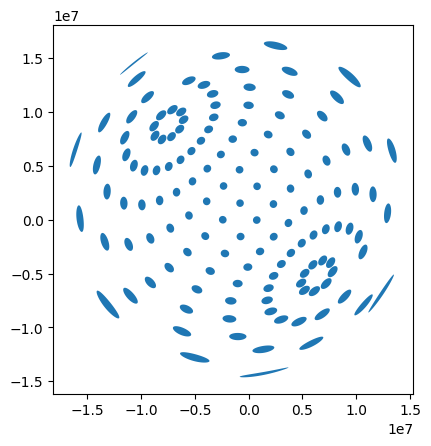

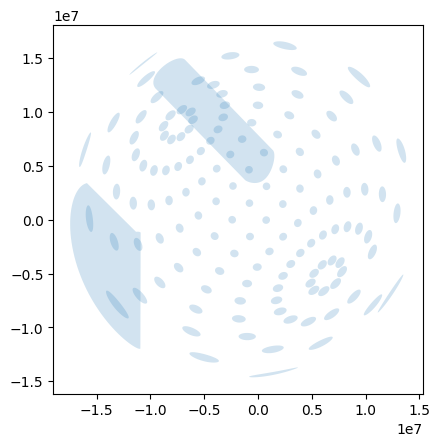

In [248]:
tmp['area'] = tmp.area
print(tmp['area'].median(), np.log10(tmp['area'].median()))
med = tmp['area'].median()
tmp2 = tmp[[np.log10(a)<(np.log10(med)+1.5) for a in tmp['area']]]

#sns.histplot(tmp2['area'])
tmp2.plot(), tmp.plot(alpha=.2)

[<POLYGON ((-8151323.655 13506626.388, -8151323.655 13506626.378, -8151323.65...>, <POLYGON ((-16475137.886 -4728977.344, -16475137.887 -4728977.354, -16475137...>]


Text(0.5, 1.0, 'Chamberlin Trimetric')

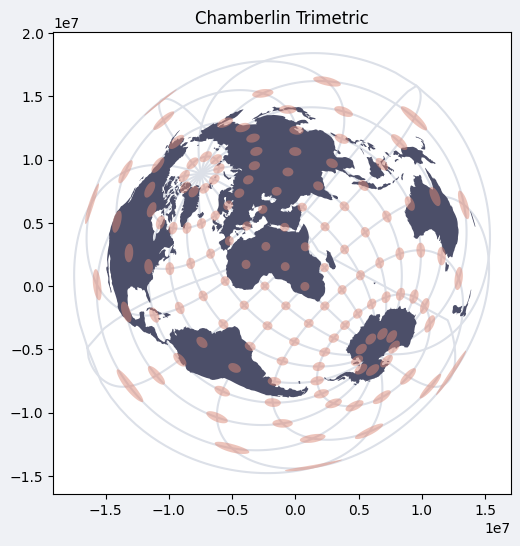

In [195]:
k = 'Chamberlin Trimetric'
crs = projections[k]

fig, ax = plt.subplots(figsize=(8, 6), facecolor=WHITE)
grid.to_crs(crs).plot(ec=LIGHTGRAY, ax=ax, zorder=2)
gdf4.to_crs(crs).plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
tmp = circles.to_crs(crs)
tmp['validity'] = tmp.is_valid

tmp['area'] = tmp.area
med = tmp['area'].median()
tmp2 = tmp[[np.log10(a)<(np.log10(med)+1) for a in tmp['area']]]

ls = []
pts = []
for i in range(len(tmp)):
    row = tmp.iloc[i]
    a = row['area']
    if not(row['validity']) or np.log10(a)>(np.log10(med)+1):
        pts.append(Point(row['x'], row['y']))
        ls.append(i)
pts = gpd.GeoSeries(pts, crs='epsg:4326').to_crs(crs).tolist()
pts = [pt.buffer(0.1) for pt in pts]
print(pts)
geom2 = []
for i in range(len(tmp)):
    if i in ls:
        geom2.append(pts[ls.index(i)])
    else:
        row = tmp.iloc[i]
        geom2.append(row['geometry'])
tmp['geometry'] = geom2
#tmp2 = tmp[tmp.is_valid]
tmp.plot(fc=RED, ec=WHITE, lw=0, alpha=.5, ax=ax, zorder=4)

ax.set_title(k)

[<POLYGON ((-19849807.719 -4368706.933, -19849807.72 -4368706.943, -19849807....>, <POLYGON ((-19822217.819 1294533.413, -19822217.82 1294533.403, -19822217.82...>, <POLYGON ((-19496700.776 6996637.811, -19496700.777 6996637.801, -19496700.7...>]


Text(0.5, 1.0, 'General Oblique Transformation')

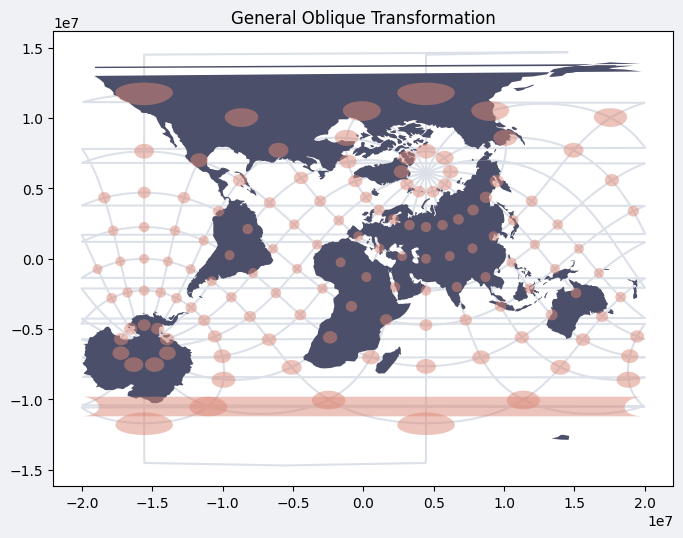

In [198]:

k = 'General Oblique Transformation'
crs = projections[k]

fig, ax = plt.subplots(figsize=(8, 6), facecolor=WHITE)
grid.to_crs(crs).plot(ec=LIGHTGRAY, ax=ax, zorder=2)
gdf4.to_crs(crs).plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
tmp = circles.to_crs(crs)
tmp['validity'] = tmp.is_valid
ls = []
pts = []
for i in range(len(tmp)):
    row = tmp.iloc[i]
    if not(row['validity']):
        pts.append(Point(row['x'], row['y']))
        ls.append(i)
pts = gpd.GeoSeries(pts, crs='epsg:4326').to_crs(crs).tolist()
pts = [pt.buffer(0.1) for pt in pts]
print(pts)
geom2 = []
for i in range(len(tmp)):
    if i in ls:
        geom2.append(pts[ls.index(i)])
    else:
        row = tmp.iloc[i]
        geom2.append(row['geometry'])
tmp['geometry'] = geom2
#tmp2 = tmp[tmp.is_valid]
tmp.plot(fc=RED, ec=WHITE, lw=0, alpha=.5, ax=ax, zorder=4)

ax.set_title(k)

Text(0.5, 1.0, 'General Oblique Transformation')

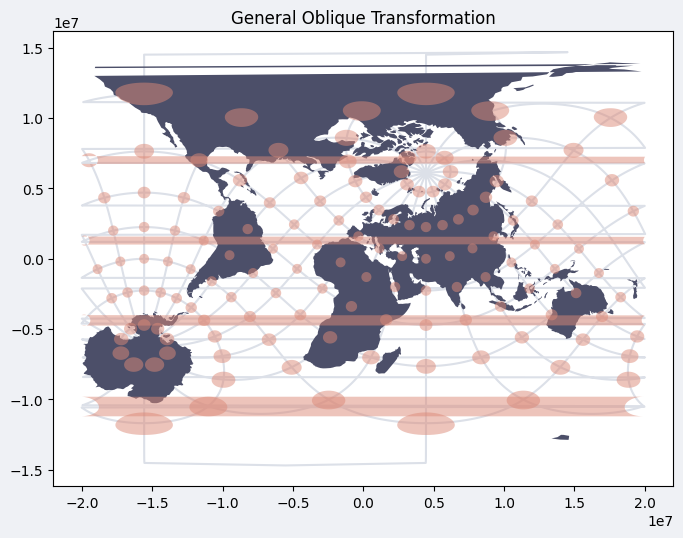

In [197]:


 k = 'General Oblique Transformation'
crs = projections[k]

fig, ax = plt.subplots(figsize=(8, 6), facecolor=WHITE)
grid.to_crs(crs).plot(ec=LIGHTGRAY, ax=ax, zorder=2)
gdf4.to_crs(crs).plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
tmp = circles.to_crs(crs)
tmp['area'] = tmp.area
Q1 = tmp['area'].quantile(.25)
Q3 = tmp['area'].quantile(.75)
IQR = Q3# - Q1
#print(IQR, Q1, Q3)
mask = tmp['area'].between(0, Q3+5*IQR, inclusive='both')
#print(mask)
#tmp2 = tmp[mask]
tmp2 = tmp[tmp.is_valid]
tmp.plot(fc=RED, ec=WHITE, lw=0, alpha=.5, ax=ax, zorder=4)

ax.set_title(k)

In [72]:
tmp['area'].quantile(.25)

843875878950.0507

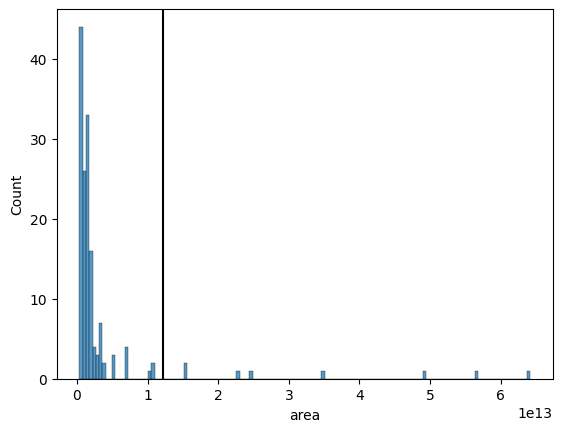

In [93]:
fig, ax = plt.subplots()
sns.histplot(tmp['area'], ax=ax)
ax.axvline(x=tmp['area'].quantile(.75)+5*IQR, c='k')

+proj=bonne +lat_1=10


<Axes: >

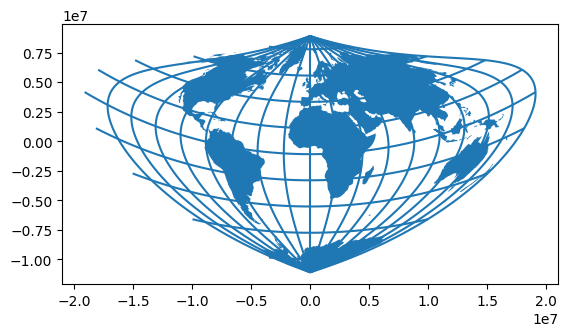

In [90]:

k = 'Bonne'
crs = projections[k]
print(crs)
fig, ax = plt.subplots()
gdf4.to_crs(crs).plot(ax=ax)
grid.to_crs(crs).plot(ax=ax)

+proj=bonne +lat_1=90
10000000.0


<Axes: >

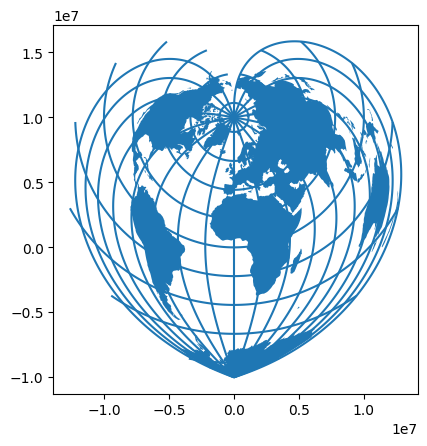

In [88]:

k = 'Werner'
crs = projections[k]
print(crs)

the_gdf = gdf4.to_crs(crs).copy()
the_grid = grid.to_crs(crs).copy()

tra = 1e7
print(tra)

the_gdf = the_gdf.translate(xoff=0.0, yoff=tra, zoff=0.0)
the_grid = the_grid.translate(xoff=0.0, yoff=tra, zoff=0.0)

fig, ax = plt.subplots()
the_gdf.plot(ax=ax)
the_grid.plot(ax=ax)


<Axes: >

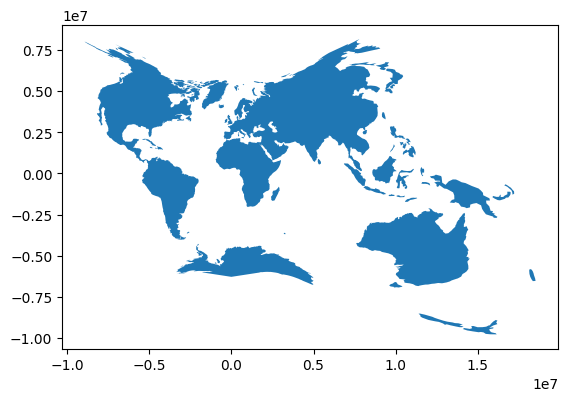

In [48]:
gdf5 = gdf4.to_crs('+proj=rouss').copy()
gdf5.scale(0.5, 0.5, origin=(0., 0.)).plot()

In [49]:
gdf5.scale(0.5, 0.5, origin=(0., 0.))

0     POLYGON ((-3023524.824 -6105444.255, -3023525....
1     POLYGON ((-3100222.050 -5658506.577, -3039995....
2     POLYGON ((-2624042.227 -5327001.545, -2676561....
3     POLYGON ((-5115191.063 740110.068, -5136958.57...
4     POLYGON ((-6750680.336 5852705.025, -6704637.4...
                            ...                        
87    POLYGON ((9101031.312 6319622.536, 9016829.446...
88    POLYGON ((8825410.039 6680108.830, 8636916.744...
89    POLYGON ((3526643.019 5960389.734, 3543120.622...
90    POLYGON ((3517254.719 6049904.468, 3389092.869...
91    POLYGON ((3092267.266 5910239.172, 3284547.451...
Length: 92, dtype: geometry

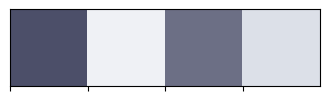

In [50]:
DARK = load_color('latte', 'text')
WHITE = load_color('latte', 'base')
LIGHTGRAY = load_color('latte', 'crust')
GRAY = load_color('latte', 'subtext0')
sns.palplot([DARK, WHITE, GRAY, LIGHTGRAY])

In [72]:
def generate_svg(the_gdf, the_grid, title, vis):
    k2 = title.replace(' ', '_')
    m = vmapper.Map(interactive=False, params={'bgcolor': WHITE})
    m.add_geodataframe(the_grid, layername='{}-grid'.format(k2), 
        draw_setting=dict(labelby='display0', idby='display2'),
        strokecolor=DARK, 
        strokewidth=30000, showlabel=False, 
        visibility=vis)
    m.add_geodataframe(the_gdf, layername='{}-land'.format(k2), 
        draw_setting=dict(labelby='id', idby='id2'), 
        color=DARK, opacity=1.0, strokecolor=DARK, strokewidth=30, showlabel=False, 
        visibility=vis)
    m.add_title(title+' Projection')
    output_path = '../exports/worldmap_{}.svg'.format(k2)
    m.export_to_file(output_path)

In [79]:
check = 0
for k, crs in projections.items():
    the_grid = grid.to_crs(crs)  #.plot(ec=GRAY, ax=ax, zorder=2)
    the_gdf = gdf4.to_crs(crs)  #.plot(fc=DARK, ec=WHITE, lw=0, ax=ax, zorder=3)
    k2 = k.replace(' ', '_')
    the_gdf['id2'] = ['{}-{}'.format(k2, i) for i in the_gdf['id']]
    the_grid['display2'] = ['{}-{}'.format(k2, i) for i in the_grid['display0']]
    vis = 'hidden' if check>0 else 'visible'
    #print(the_gdf)
    generate_svg(the_gdf, the_grid, k, vis)
    #check+=1
    #break

exported to : exports/worldmap_Gall.svg
exported to : exports/worldmap_Miller_Cylindrical.svg
exported to : exports/worldmap_Goode.svg
exported to : exports/worldmap_Mollweide.svg
exported to : exports/worldmap_Aitoff.svg
exported to : exports/worldmap_Lagrange.svg
exported to : exports/worldmap_Natural_Earth.svg
exported to : exports/worldmap_Robinson.svg
exported to : exports/worldmap_Winkel_Tripel.svg
exported to : exports/worldmap_Eckert_III.svg
exported to : exports/worldmap_Hammer-Eckert-Greifendorff.svg
exported to : exports/worldmap_Nell-Hammer.svg
exported to : exports/worldmap_Collignon.svg
exported to : exports/worldmap_Lambert_Azimuthal_Equal_Area.svg
exported to : exports/worldmap_Lambert_Equal_Area_Conic.svg
exported to : exports/worldmap_Sinusoidal.svg
exported to : exports/worldmap_Polyconic.svg
exported to : exports/worldmap_Foucaut.svg
exported to : exports/worldmap_Bonne.svg
exported to : exports/worldmap_Boggs_Eumorphic.svg
exported to : exports/worldmap_General_Obl

In [39]:
circles['cid'] = ['cir_{}'.format(i) for i in list(range(len(circles)))]
circles

x   y                                           geometry      cid
0   -160 -80  POLYGON ((-142.49998 -79.52511, -142.06682 -79...    cir_0
1   -120 -80  POLYGON ((-102.49998 -79.52511, -102.06682 -79...    cir_1
2    -80 -80  POLYGON ((-62.49998 -79.52511, -62.06682 -79.8...    cir_2
3    -40 -80  POLYGON ((-22.49998 -79.52511, -22.06682 -79.8...    cir_3
4      0 -80  POLYGON ((17.50002 -79.52511, 17.93318 -79.822...    cir_4
..   ...  ..                                                ...      ...
132    0  80  POLYGON ((17.50002 79.52511, 16.93618 79.23573...  cir_132
133   40  80  POLYGON ((57.50002 79.52511, 56.93618 79.23573...  cir_133
134   80  80  POLYGON ((97.50002 79.52511, 96.93618 79.23573...  cir_134
135  120  80  POLYGON ((137.50002 79.52511, 136.93618 79.235...  cir_135
136  160  80  POLYGON ((177.50002 79.52511, 176.93618 79.235...  cir_136

[137 rows x 4 columns]

In [40]:
def get_circles(tmp):
    tmp['validity'] = tmp.is_valid
    tmp['area'] = tmp.area
    med = tmp['area'].median()
    ls = []
    pts = []
    for i in range(len(tmp)):
        row = tmp.iloc[i]
        a = row['area']
        if not(row['validity']) or np.log10(a)>(np.log10(med)+1.5):
            pts.append(Point(row['x'], row['y']))
            ls.append(i)
    pts = gpd.GeoSeries(pts, crs='epsg:4326').to_crs(crs).tolist()
    pts = [pt.buffer(0.1) for pt in pts]
    #print(pts)
    geom2 = []
    for i in range(len(tmp)):
        if i in ls:
            geom2.append(pts[ls.index(i)])
        else:
            row = tmp.iloc[i]
            geom2.append(row['geometry'])
    tmp['geometry'] = geom2
    #tmp2 = tmp[tmp.is_valid]
    #tmp.plot(fc=RED, ec=WHITE, lw=0, alpha=.5, ax=ax, zorder=4)
    return tmp

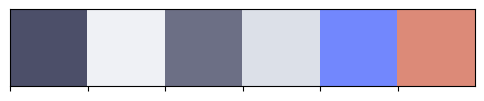

In [41]:
DARK = load_color('latte', 'text')
WHITE = load_color('latte', 'base')
LIGHTGRAY = load_color('latte', 'crust')
GRAY = load_color('latte', 'subtext0')
LINE = load_color('latte', 'lavender')
RED = load_color('latte', 'rosewater')
sns.palplot([DARK, WHITE, GRAY, LIGHTGRAY, LINE, RED])

In [42]:
def generate_svg2(m, the_gdf, the_grid, the_circle, title, vis):
    #m = vmapper.Map(interactive=False, params={'bgcolor': WHITE})
    m.add_geodataframe(the_grid, layername='{}-grid'.format(title.replace(' ', '_')), 
        draw_setting=dict(labelby='display0', idby='display2'),
        strokecolor=LINE, opacity=0.7,
        strokewidth=30000, showlabel=False, visibility=vis)
    m.add_geodataframe(the_gdf, layername='{}-land'.format(title.replace(' ', '_')), 
        draw_setting=dict(labelby='id', idby='id2'), 
        color=DARK, opacity=1.0, strokecolor=DARK, strokewidth=30, showlabel=False, 
        visibility=vis)
    m.add_geodataframe(the_circle, layername='{}-circle'.format(title.replace(' ', '_')), 
        draw_setting=dict(labelby='cid', idby='cid2'),
        color=RED, strokecolor=RED, opacity=0.4,
        strokewidth=30, showlabel=False, visibility=vis)
    #m.add_title(title+' Projection')

In [100]:
m = vmapper.Map(interactive=False, params={'bgcolor': WHITE})

scale_factors = {'Roussilhe Stereographic':.45, 
                 'Lambert Conformal Conic Alternative':.5, 
                 'Collignon': 0.7,
                 'Tissot': .8, 'Murdoch I': .8, 'Vitkovsky I': .8, 'Euler': .8, 'Azimuthal Equidistant': .8, 'Azimuthal Equidistant-UN': .8, 'van der Grinten': .8,
                 'Chamberlin Trimetric': .8,
                }
trans = {'Werner': (0.0, 1e7),
         #'Peirce Quincuncial': (0.0, -2e6),
         #'Adams World in a Square I': (0.0, -4e6),
         #'Adams World in a Square II': (0.0, -4e6),
         'Euler': (0.0, -7e6),
         'Tissot': (0.0, -7e6),
         'Vitkovsky I': (0.0, -7e6),
         'Murdoch I': (0.0, -7e6),
        }
#  'Peirce Quincuncial-Diamond'
check = 0
proj_list = []
for k, crs in projections.items():
    vis = 'hidden' if check>0 else 'visible'
    the_grid = grid.to_crs(crs).copy() 
    the_gdf = gdf4.to_crs(crs).copy() 
    the_circle = circles.to_crs(crs).copy()
    the_circle = get_circles(the_circle)
    if k in scale_factors:
        scale_factor = scale_factors[k]
        the_grid['geometry'] = the_grid.scale(scale_factor, scale_factor, 
                                              origin=(0., 0.))
        the_gdf['geometry'] = the_gdf.scale(scale_factor, scale_factor, 
                                              origin=(0., 0.))
        the_circle['geometry'] = the_circle.scale(scale_factor, scale_factor, 
                                              origin=(0., 0.))
    if k in trans:
        xoff, yoff = trans[k]
        the_grid['geometry'] = the_grid.translate(xoff=xoff, yoff=yoff, zoff=0.0)
        the_gdf['geometry'] = the_gdf.translate(xoff=xoff, yoff=yoff, zoff=0.0)
        the_circle['geometry'] = the_circle.translate(xoff=xoff, yoff=yoff, zoff=0.0)
    k2 = k.replace(' ', '_')
    the_gdf['id2'] = ['{}-{}'.format(k2, i) for i in the_gdf['id']]
    the_grid['display2'] = ['{}-{}'.format(k2, i) for i in the_grid['display0']]
    the_circle['cid2'] = ['{}-{}'.format(k2, i) for i in the_circle['cid']]

    generate_svg2(m, the_gdf, the_grid, the_circle, k, vis)
    proj_list.append(k)
    print(k)
    check+=1
    #if check==4:
    #    break

#output_path = 'exports/worldmap_all.svg'
#m.export_to_file(output_path)

Equal Earth
Natural Earth
Robinson
Eckert III
Urmaev Flat-Polar Sinusoidal
Nell-Hammer
Winkel Tripel
Times
Bacon Globular
Lagrange
van der Grinten
Fahey
Mollweide
Hammer-Eckert-Greifendorff
Aitoff
Boggs Eumorphic
Sinusoidal
Foucaut
Roussilhe Stereographic
Bonne
Werner
Polyconic
Rectangular Polyconic
Laskowski
Lambert Azimuthal Equal Area
Chamberlin Trimetric
Azimuthal Equidistant
Azimuthal Equidistant-UN
Euler
Tissot
Vitkovsky I
Murdoch I
Lambert Conformal Conic Alternative
Lambert Equal Area Conic
Gall Stereographic
Miller Cylindrical
Patterson
General Oblique Transformation
Peirce Quincuncial
Adams World in a Square I
Adams World in a Square II
Collignon
Interrupted Goode Homolosine
Interrupted Mollweide


In [101]:
svgText = m.make_scene()
#print(outputText)

In [102]:
temp_vars = {'first_title': proj_list[0], 
             'first_proj4': projections[proj_list[0]],
             'content': svgText,
             'projections_collection': proj_list[1:],
             'projs': projections,
}
temp_vars['first_title']

'Equal Earth'

In [104]:
templateLoader = jinja2.FileSystemLoader( searchpath="." )
templateEnv = jinja2.Environment( loader=templateLoader )
TEMPLATE_FILE = "map_templateb.html"

template = templateEnv.get_template( TEMPLATE_FILE )
outputText = template.render( temp_vars )

outputfn = 'test3b.html'

with open(outputfn, 'wb') as f:
    f.write(outputText.encode("utf-8"))